# Forecasting the time it takes to resolve a 311 calls

In [2]:
# Packages to load

import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Reading the Data set

import os

path = ("/Users/saurabhsethia/Downloads/archive/311-DSNY-20151017.csv")
df = pd.read_csv(path)

In [6]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,29653961,01/07/2015 06:50:12 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,10 s4 st,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29655441,01/07/2015 08:17:00 AM,01/07/2015 12:00:00 PM,DSNY,BCC - Queens East,Snow,15S Re-Plow/Spread/Ice-Snow Cond.,Street,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29750581,01/19/2015 05:00:00 PM,01/21/2015 12:00:00 PM,DSNY,BCC - Queens West,Litter Basket / Request,10 Litter Basket / Request,Sidewalk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29767423,01/22/2015 09:21:00 AM,01/31/2015 12:00:00 PM,DSNY,A - Canine Task Force Citywide,Dirty Conditions,E8 Canine Violation,Sidewalk,NaN,QUEENS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29618799,01/02/2015 06:11:00 AM,01/05/2015 12:00:00 PM,DSNY,Bronx 10,Sanitation Condition,12 Dead Animals,Sidewalk,NaN,HUTCHISON RIVER PKW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(576487, 41)

## Exploratory Data Analysis

In [8]:
df_c1 = df.copy()
df_c1.shape

(576487, 41)

In [13]:
df_c1 =df_c1.drop_duplicates()

In [12]:
df_c1.shape

(576487, 41)

## Dropping Non-informational Features

In [14]:
df_c1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [15]:
df_c1.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         6245
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                       8694
Incident Zip                       13286
Incident Address                   87655
Street Name                        87655
Cross Street 1                    141042
Cross Street 2                    163011
Intersection Street 1             491742
Intersection Street 2             491742
Address Type                        2946
City                               13235
Landmark                          576487
Facility Type                     354799
Status                                 0
Due Date                          533927
Resolution Description             49243
Resolution Action Updated Date      1846
Community Board                     1588
BBL             

In [16]:
df_c1.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description             True
Resolution Action Updated Date     True
Community Board                    True
BBL                                True


In [18]:
df_c1.isnull().sum().sort_values(ascending =False)/len(df_c1)*100

Vehicle Type                      100.000000
Taxi Company Borough              100.000000
Landmark                          100.000000
Bridge Highway Segment            100.000000
Road Ramp                         100.000000
Bridge Highway Direction          100.000000
Bridge Highway Name               100.000000
Taxi Pick Up Location             100.000000
Due Date                           92.617353
Intersection Street 1              85.299755
Intersection Street 2              85.299755
Facility Type                      61.545013
Cross Street 2                     28.276613
Cross Street 1                     24.465773
BBL                                20.382593
Street Name                        15.205026
Incident Address                   15.205026
Resolution Description              8.541910
Longitude                           2.392769
Location                            2.392769
Latitude                            2.392769
X Coordinate (State Plane)          2.392769
Y Coordina

In [19]:
df_c1.describe()

,Unique Key,Incident Zip,Landmark,BBL,X Coordinate (State Plane),Y Coordinate (State Plane),Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
count,5.764870e+05,563201.000000,0.0,4.589840e+05,5.626930e+05,562693.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,562693.000000,562693.000000
mean,3.434223e+07,10948.041131,NaN,3.252008e+09,1.003264e+06,194139.609334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699478,-73.931362
std,2.546940e+06,507.500466,NaN,1.135821e+09,2.863856e+04,29673.318282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081444,0.103245
min,2.961246e+07,0.000000,NaN,0.000000e+00,9.133570e+05,121098.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.498807,-74.254937
25%,3.210910e+07,10458.000000,NaN,3.009370e+09,9.887710e+05,171770.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.638117,-73.983699
50%,3.458516e+07,11215.000000,NaN,3.064080e+09,1.003949e+06,190785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.690236,-73.928956
75%,3.673069e+07,11358.000000,NaN,4.082320e+09,1.022870e+06,212485.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749821,-73.860590
max,3.834384e+07,11697.000000,NaN,5.200150e+09,1.067279e+06,271755.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.912536,-73.700384


In [20]:
# Computing the % of missing Values

percent_missing = pd.DataFrame(df_c1.isnull().sum().sort_values(ascending=False)/ len(df_c1)*100, columns=['% Missing'])
percent_missing = percent_missing.rename_axis('Features').reset_index()
percent_missing.head(12)

,Features,% Missing
0,Vehicle Type,100.000000
1,Taxi Company Borough,100.000000
2,Landmark,100.000000
3,Bridge Highway Segment,100.000000
4,Road Ramp,100.000000
5,Bridge Highway Direction,100.000000
6,Bridge Highway Name,100.000000
7,Taxi Pick Up Location,100.000000
8,Due Date,92.617353
9,Intersection Street 1,85.299755


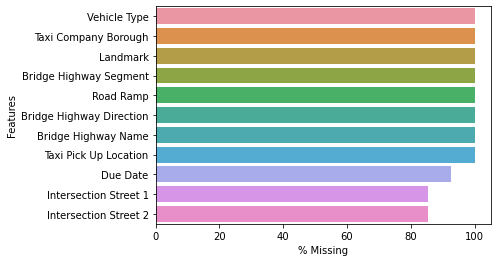

In [21]:
# Filtering the subset with morethan 80% of missing values

p_80 = percent_missing[percent_missing['% Missing'] >=80]

#bar plot 
ax = sns.barplot(x=p_80['% Missing'], y =p_80['Features'], orient='h')

In [25]:
#After dropping the columns with >80% missing data: Rows, Columns

df_c1.shape

(576487, 30)

## Checking the cardinality

In [27]:
# Computing the Cardinality of the features

cardinality = pd.DataFrame(df_c1.nunique(), columns=['Cardinality'])
cardinality = cardinality.reset_index().sort_values(by='Cardinality', ascending=False)
cardinality.head(10)

,index,Cardinality
0,Unique Key,576487
1,Created Date,386117
29,Location,285656
27,Latitude,285654
28,Longitude,285654
9,Incident Address,265035
20,BBL,225088
23,Y Coordinate (State Plane),106643
22,X Coordinate (State Plane),101059
18,Resolution Action Updated Date,32635


In [28]:
#Extracting high cardinal values

high_c = ['Unique Key','Location','Latitude','Longitude','BBL','Y Coordinate (State Plane)',
          'X Coordinate (State Plane)']
df_c1[high_c].tail()

,Unique Key,Location,Latitude,Longitude,BBL,Y Coordinate (State Plane),X Coordinate (State Plane)
576482,38093331,"(40.69413344540047, -73.96414420184784)",40.694133,-73.964144,3.018930e+09,192170.0,994193.0
576483,38093343,"(40.6531292016264, -73.95610427350206)",40.653129,-73.956104,3.050838e+09,177232.0,996430.0
576484,32306758,"(40.67770285755642, -73.76002369489642)",40.677703,-73.760024,4.129970e+09,186273.0,1050813.0
576485,32308741,"(40.728622570989664, -73.72048407679036)",40.728623,-73.720484,4.086370e+09,204857.0,1061721.0
576486,32310482,"(40.7126409467281, -73.80015367274495)",40.712641,-73.800154,4.098470e+09,198974.0,1039653.0


In [29]:
#dropping the high cardinal features

df_c1 = df_c1.drop(columns = high_c)
df_c1.shape

(576487, 23)

## Checking the Univariate Variables

In [30]:
df_UC = cardinality[cardinality['Cardinality']==1]
df_UC

,index,Cardinality
3,Agency,1
25,Park Facility Name,1
15,Facility Type,1


In [31]:
#dropping the univariant variables
df_c1 = df_c1.drop(columns = df_UC['index'])

In [32]:
df_c1.shape

(576487, 20)

In [33]:
df_c1.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Open Data Channel Type,Park Borough
0,01/07/2015 06:50:12 PM,NaN,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,10 s4 st,s4 st,NaN,NaN,ADDRESS,NaN,Open,NaN,01/07/2015 06:50:12 PM,Unspecified BROOKLYN,BROOKLYN,OTHER,BROOKLYN
1,01/07/2015 08:17:00 AM,01/07/2015 12:00:00 PM,BCC - Queens East,Snow,15S Re-Plow/Spread/Ice-Snow Cond.,Street,NaN,NaN,NaN,NaN,NaN,INTERSECTION,NaN,Closed,The Department of Sanitation investigated this...,01/07/2015 12:00:00 PM,13 QUEENS,QUEENS,PHONE,QUEENS
2,01/19/2015 05:00:00 PM,01/21/2015 12:00:00 PM,BCC - Queens West,Litter Basket / Request,10 Litter Basket / Request,Sidewalk,NaN,NaN,NaN,NaN,NaN,INTERSECTION,NaN,Closed,The Department of Sanitation investigated this...,01/21/2015 12:00:00 PM,05 QUEENS,QUEENS,PHONE,QUEENS
3,01/22/2015 09:21:00 AM,01/31/2015 12:00:00 PM,A - Canine Task Force Citywide,Dirty Conditions,E8 Canine Violation,Sidewalk,NaN,QUEENS BOULEVARD,QUEENS BOULEVARD,83 STREET,VAN WYCK EXPRESSWAY,BLOCKFACE,NaN,Closed,The Department of Sanitation investigated this...,01/31/2015 12:00:00 PM,09 QUEENS,QUEENS,ONLINE,QUEENS
4,01/02/2015 06:11:00 AM,01/05/2015 12:00:00 PM,Bronx 10,Sanitation Condition,12 Dead Animals,Sidewalk,NaN,HUTCHISON RIVER PKW,HUTCHISON RIVER PKW,EAST TREMONT AVENUE,NaN,NaN,NaN,Closed,The Department of Sanitation investigated this...,01/05/2015 12:00:00 PM,10 BRONX,BRONX,PHONE,BRONX


## Deriving the Target Variable

Considering the objective of estimating the time it takes to resolving a 311 call, we first derive the target variable from created date and closed date

In [34]:
#Understanding the datatypes of the date fields
df_c1[['Created Date','Closed Date']].dtypes

Created Date    object
Closed Date     object
dtype: object

In [35]:
#Computing missing value %
df_c1[['Created Date','Closed Date']].isnull().sum()/len(df_c1) * 100

Created Date    0.000000
Closed Date     1.083285
dtype: float64

In [36]:
# Type casting the Created date field from obj to datetime
df_c1['Created Date']= pd.to_datetime(df_c1['Created Date'])

In [37]:
#Type casting the Closed Date
#Setting the errors parameter in pd.to_datetime to 'coerce' causes replacement of out of bounds values with NaT
#df_c1['Closed Date'] = pd.to_datetime(df_c1['Closed Date'])

## what is OutofBoundDatetime error

Per pandas documentation, pandas represents timestamps in nanosecond resolution and the timespan that can be represented using a 64-bit integer is limited to approximately 584 years

In [38]:
print("Min pandas date : ", pd.Timestamp.min)

print("Max pandas date : ", pd.Timestamp.max)

Min pandas date :  1677-09-21 00:12:43.145225
Max pandas date :  2262-04-11 23:47:16.854775807


## Handling OutOfBoundsDatetime Error

Setting the errors parameter in pd.to_datetime to 'coerce' causes replacement of out of bounds values with NaT


In [39]:
# TypeCasting closed date
df_c1['Closed Date'] = pd.to_datetime(df_c1['Closed Date'], errors ='coerce')

In [40]:
df_c1[['Created Date', 'Closed Date']].describe(datetime_is_numeric=True)

,Created Date,Closed Date
count,576487,570241
mean,2016-09-13 11:06:34.389800192,2016-09-25 06:21:52.180769536
min,2015-01-01 01:57:00,1900-01-01 00:00:00
25%,2015-12-01 13:59:00,2015-12-10 12:00:00
50%,2016-10-17 13:29:00,2016-10-28 12:00:00
75%,2017-07-18 16:26:30,2017-07-26 12:00:00
max,2017-12-31 23:50:00,2201-12-05 00:00:00


We can clearly depict that, closed date column has a lot of outliers

<AxesSubplot:title={'center':'Year wise Case Counts'}, ylabel='Closed Date Year'>

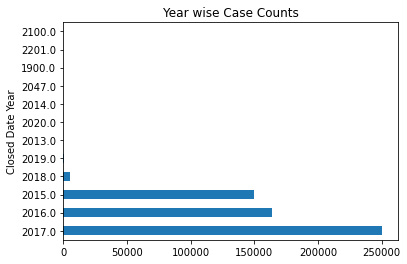

In [41]:
#Extracting Year from Date

df_c1['Closed_date_year'] = pd.DatetimeIndex(df_c1['Closed Date']).year

#Visualizing year wise volume counts
df_c1['Closed_date_year'].value_counts().plot(kind='barh', title="Year wise Case Counts", xlabel='Closed Date Year',
ylabel='Counts')

In [42]:
#Volume Counts
volumes =pd.DataFrame(df_c1['Closed_date_year'].value_counts())
volumes.head()

,Closed_date_year
2017.0,250487
2016.0,163966
2015.0,149555
2018.0,5433
2019.0,777


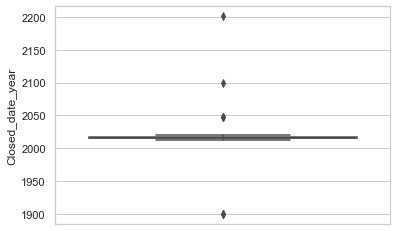

In [43]:
sns.set_theme(style='whitegrid')
ax=sns.boxplot(y=df_c1["Closed_date_year"])

In [44]:
#df_c1.head()

Per the records the data is recorded for calls between 01/2015 to 12/2017. But as per the data few cases are closed even in the past and future dates. This could be due to human errors or any other reasons. We consider them as outliers

## Treating the Outliers

In [45]:
#filtering outlier dataset
df_o = df_c1[(df_c1['Closed_date_year']>2020) | (df_c1['Closed_date_year']<2015)]

In [46]:
df_o[['Closed_date_year','Created Date','Closed Date']].head()

,Closed_date_year,Created Date,Closed Date
6155,2014.0,2015-06-22 19:57:11,2014-08-27
7553,2013.0,2015-10-07 15:26:34,2013-10-22
7613,2013.0,2015-10-08 11:15:47,2013-10-22
126944,2013.0,2015-02-26 18:50:06,2013-05-20
127412,2013.0,2015-02-27 13:50:09,2013-05-20


In [47]:
df_o['Closed_date_year'].unique()

array([2014., 2013., 1900., 2100., 2047., 2201.])

In [48]:
#removing out of bound data set

df_c1 = df_c1.drop(df_o.index)
print(df_c1.shape)

(576467, 21)


In [49]:
#Checking for records with same closed and created dates
df_s = df_c1[df_c1['Closed Date']==df_c1['Created Date']]
df_s.shape

(38477, 21)

In [50]:
df_s[['Created Date', 'Closed Date']].head()

,Created Date,Closed Date
10,2015-01-02 12:12:00,2015-01-02 12:12:00
20,2015-01-05 16:21:00,2015-01-05 16:21:00
54,2015-01-14 14:33:00,2015-01-14 14:33:00
77,2015-01-28 18:16:00,2015-01-28 18:16:00
91,2015-01-23 15:23:00,2015-01-23 15:23:00


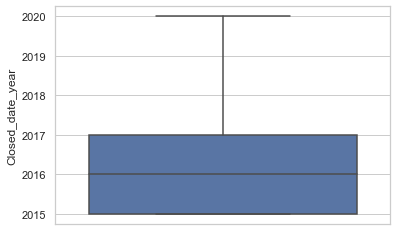

In [51]:
#Box plot after removing Outliers
sns.set_theme(style='whitegrid')
ax = sns.boxplot(y=df_c1['Closed_date_year'])

## Deriving the Target/Independent Variable

In [52]:
#Dropping columns with no closed dates

df_c1=df_c1[df_c1['Closed Date'].notnull()]

In [53]:
#Computing the delta
df_c1['Est_time'] = df_c1['Closed Date']- df_c1['Created Date']

#Computing the delta in seconds
df_c1['Est_time_sec'] = (df_c1['Closed Date'] - df_c1['Created Date']).dt.total_seconds() 

#Computing the delta in minutes
df_c1['Est_time_minutes'] = (df_c1['Closed Date'] -df_c1['Created Date'])/pd.Timedelta(minutes=1)

#Computing the delta in hours
df_c1['Est_time_Hours'] = (df_c1['Closed Date']- df_c1['Created Date'])/pd.Timedelta(hours=1)

#Computing the delta in days
df_c1['Est_time_Days'] = (df_c1['Closed Date']-df_c1['Created Date'])/pd.Timedelta(days=1)

In [54]:
df_c1[['Created Date','Closed Date','Est_time','Est_time_minutes','Est_time_Hours','Est_time_Days']].head()

,Created Date,Closed Date,Est_time,Est_time_minutes,Est_time_Hours,Est_time_Days
1,2015-01-07 08:17:00,2015-01-07 12:00:00,0 days 03:43:00,223.0,3.716667,0.154861
2,2015-01-19 17:00:00,2015-01-21 12:00:00,1 days 19:00:00,2580.0,43.000000,1.791667
3,2015-01-22 09:21:00,2015-01-31 12:00:00,9 days 02:39:00,13119.0,218.650000,9.110417
4,2015-01-02 06:11:00,2015-01-05 12:00:00,3 days 05:49:00,4669.0,77.816667,3.242361
5,2015-01-02 09:57:00,2015-01-05 12:00:00,3 days 02:03:00,4443.0,74.050000,3.085417


In [55]:
# Formatting numbers with setting decimal point up to 2 digits
pd.set_option('display.float_format','{:.2f}'.format)
df_c1[['Est_time','Est_time_sec','Est_time_minutes','Est_time_Hours','Est_time_Days']].describe()

,Est_time,Est_time_sec,Est_time_minutes,Est_time_Hours,Est_time_Days
count,570221,570221.00,570221.00,570221.00,570221.00
mean,10 days 06:38:12.705752675,887892.71,14798.21,246.64,10.28
std,37 days 22:49:50.585725881,3278990.59,54649.84,910.83,37.95
min,-322 days +12:45:55,-27774845.00,-462914.08,-7715.23,-321.47
25%,0 days 22:33:00,81180.00,1353.00,22.55,0.94
50%,1 days 17:49:00,150540.00,2509.00,41.82,1.74
75%,3 days 21:35:00,336900.00,5615.00,93.58,3.90
max,1547 days 00:00:00,133660800.00,2227680.00,37128.00,1547.00


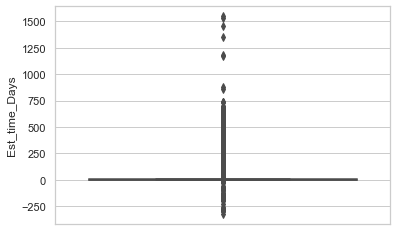

In [56]:
#Box plot to understand distibution of target
sns.set_theme(style='whitegrid')
ax=sns.boxplot(y=df_c1['Est_time_Days'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


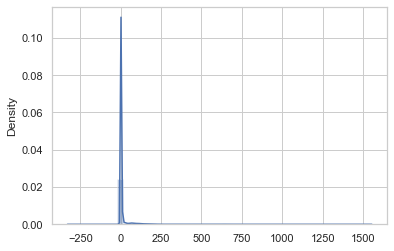

In [57]:
#dist Plot to understand distribution of target
sns.set_theme(style='whitegrid')
ax=sns.distplot(x=df_c1['Est_time_Days'])
ax.ticklabel_format(useOffset=False, style='plain')

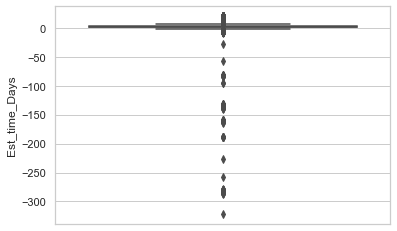

In [58]:
#Box plot on subset of data
sns.set_theme(style='whitegrid')
ax =sns.boxplot(y=df_c1[df_c1['Est_time_Days']<20]['Est_time_Days'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


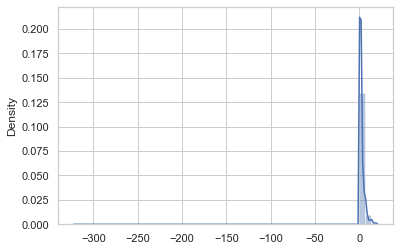

In [59]:
#Distplot on subset of data
ax = sns.distplot(x= df_c1[df_c1['Est_time_Days']<20]['Est_time_Days'])
ax.ticklabel_format(useOffset=False,style='plain')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


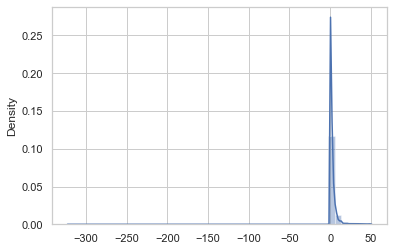

In [60]:
#Distplot plot on subset of data
ax=sns.distplot(x=df_c1[df_c1['Est_time_Days']<50]['Est_time_Days'])
ax.ticklabel_format(useOffset=False,style='plain')

In [61]:
df_c1.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'City', 'Status', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'Open Data Channel Type', 'Park Borough', 'Closed_date_year',
       'Est_time', 'Est_time_sec', 'Est_time_minutes', 'Est_time_Hours',
       'Est_time_Days'],
      dtype='object')

In [62]:
df_c1.nunique()

Created Date                      380969
Closed Date                        25589
Agency Name                           43
Complaint Type                        23
Descriptor                            62
Location Type                          7
Incident Zip                         215
Incident Address                  261806
Street Name                         9911
Cross Street 1                     16988
Cross Street 2                      8940
Address Type                           3
City                                  47
Status                                 4
Resolution Description                66
Resolution Action Updated Date     29732
Community Board                       77
Borough                                6
Open Data Channel Type                 5
Park Borough                           6
Closed_date_year                       6
Est_time                           66378
Est_time_sec                       66378
Est_time_minutes                   66378
Est_time_Hours  

In [63]:
#Dropping base fields and non important derived fields

col =['Created Date', 'Closed Date','Incident Address','Street Name','Cross Street 1','Cross Street 2',
      'Resolution Action Updated Date','Resolution Description','Est_time','Est_time_sec','Est_time_Hours',
      'Est_time_Days','Closed_date_year']

df_c1 = df_c1.drop(columns = col)
df_c1.shape

(570221, 13)

In [64]:
df_c1.nunique()

Agency Name                  43
Complaint Type               23
Descriptor                   62
Location Type                 7
Incident Zip                215
Address Type                  3
City                         47
Status                        4
Community Board              77
Borough                       6
Open Data Channel Type        5
Park Borough                  6
Est_time_minutes          66378
dtype: int64

## Handling Missing Values

In [65]:
df_c1 = df_c1.fillna('-9')

## Feature Engineering

Handling High cardinal Features

In [66]:
class BetaEncoder(object):
        
    def __init__(self, group):
        
        self.group = group
        self.stats = None
        
    # get counts from df
    def fit(self, df, target_col):
        self.prior_mean = np.mean(df[target_col].astype('float'))
        stats = df[[target_col, self.group]].groupby(self.group)
        stats = stats.agg(['sum', 'count'])[target_col]    
        stats.rename(columns={'sum': 'n', 'count': 'N'}, inplace=True)
        stats.reset_index(level=0, inplace=True)           
        self.stats = stats
        
    # extract posterior statistics
    def transform(self, df, stat_type, N_min=1):
        
        df_stats = pd.merge(df[[self.group]], self.stats, how='left')
        n = df_stats['n'].copy()
        N = df_stats['N'].copy()
        
        # fill in missing
        nan_indexs = pd.isnull(n)
        n[nan_indexs] = self.prior_mean
        N[nan_indexs] = 1.0
        
        # prior parameters
        N_prior = np.maximum(N_min-N, 0)
        alpha_prior = self.prior_mean*N_prior
        #print(alpha_prior)
        beta_prior = (1-self.prior_mean)*N_prior
        #print(beta_prior)
        
        # posterior parameters
        alpha = alpha_prior + n
        beta =  beta_prior + N-n
        
        # calculate statistics
        if stat_type=='mean':
            num = alpha
            dem = alpha+beta
                    
        elif stat_type=='mode':
            num = alpha-1
            dem = alpha+beta-2
            
        elif stat_type=='median':
            num = alpha-1/3
            dem = alpha+beta-2/3
        
        elif stat_type=='var':
            num = alpha*beta
            dem = (alpha+beta)**2*(alpha+beta+1)
                    
        elif stat_type=='skewness':
            num = 2*(beta-alpha)*np.sqrt(alpha+beta+1)
            dem = (alpha+beta+2)*np.sqrt(alpha*beta)

        elif stat_type=='kurtosis':
            num = 6*(alpha-beta)**2*(alpha+beta+1) - alpha*beta*(alpha+beta+2)
            dem = alpha*beta*(alpha+beta+2)*(alpha+beta+3)

        else:
            num = self.prior_mean
            dem = np.ones_like(N_prior)
            
        # replace missing
        value = num/dem
        value[pd.isnull(value)] = np.nanmedian(value)
        return value

In [67]:
def cat_capping(data, categ_feat, cum_th):
    
    data_c = data.copy()
    
    for col in categ_feat:
        v_c = data_c[col].value_counts()
        N_C = v_c.count()

        if N_C <=10:
            I = N_C 
        elif N_C > 10 and N_C <= 100:
            I = 5
        elif N_C > 100 and N_C <=250:
            I = 10
        elif N_C > 250 and N_C <= 500:
            I =25
        elif N_C > 500 and N_C <=1000:
            I = 50
        else: 
            I = 100
        C_T = 0
        N = 0
        while C_T <= float(cum_th):
            N = N+I 
            C_T = (float(v_c.nlargest(N).values.sum())/float(v_c.sum()))*100
        allowed_cats = v_c.nlargest(N).index
        # capping the feature
        if data_c[col].isna().sum() == 0:
            pass
        else:
            data_c.loc[~data_c[col].isin(allowed_cats), col] = col +'New'
    
    return data_c

In [ ]:
def cap_att(dataframe,cat_variables, cardinality):
    cap_list = []
    for col in cat_variables:
        c = dataframe[col].value_counts().count()
        if c > cardinality:
            cap_list.append(col)
        else:
            pass
    return cap_list

In [68]:
df_c1.columns


Index(['Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Address Type', 'City', 'Status', 'Community Board',
       'Borough', 'Open Data Channel Type', 'Park Borough',
       'Est_time_minutes'],
      dtype='object')

In [69]:
cat_f  =['Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Address Type', 'City', 'Status', 'Community Board',
       'Borough', 'Open Data Channel Type', 'Park Borough']

In [72]:
df_c1.nunique()

Agency Name                  43
Complaint Type               23
Descriptor                   62
Location Type                 8
Incident Zip                216
Address Type                  4
City                         48
Status                        4
Community Board              78
Borough                       7
Open Data Channel Type        5
Park Borough                  7
Est_time_minutes          66378
dtype: int64

In [73]:
df_c1.head()

,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Status,Community Board,Borough,Open Data Channel Type,Park Borough,Est_time_minutes
1,BCC - Queens East,Snow,15S Re-Plow/Spread/Ice-Snow Cond.,Street,-9,INTERSECTION,-9,Closed,13 QUEENS,QUEENS,PHONE,QUEENS,223.00
2,BCC - Queens West,Litter Basket / Request,10 Litter Basket / Request,Sidewalk,-9,INTERSECTION,-9,Closed,05 QUEENS,QUEENS,PHONE,QUEENS,2580.00
3,A - Canine Task Force Citywide,Dirty Conditions,E8 Canine Violation,Sidewalk,-9,BLOCKFACE,-9,Closed,09 QUEENS,QUEENS,ONLINE,QUEENS,13119.00
4,Bronx 10,Sanitation Condition,12 Dead Animals,Sidewalk,-9,-9,-9,Closed,10 BRONX,BRONX,PHONE,BRONX,4669.00
5,Brooklyn North 03,Sweeping/Missed,3A Sweeping/Missed,Sidewalk,-9,INTERSECTION,-9,Closed,03 BROOKLYN,BROOKLYN,PHONE,BROOKLYN,4443.00


In [74]:
#Considering only the time of est call whose status is closed
df_c1 = df_c1[df_c1['Status']=='Closed']
df_c1.head()

,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Status,Community Board,Borough,Open Data Channel Type,Park Borough,Est_time_minutes
1,BCC - Queens East,Snow,15S Re-Plow/Spread/Ice-Snow Cond.,Street,-9,INTERSECTION,-9,Closed,13 QUEENS,QUEENS,PHONE,QUEENS,223.00
2,BCC - Queens West,Litter Basket / Request,10 Litter Basket / Request,Sidewalk,-9,INTERSECTION,-9,Closed,05 QUEENS,QUEENS,PHONE,QUEENS,2580.00
3,A - Canine Task Force Citywide,Dirty Conditions,E8 Canine Violation,Sidewalk,-9,BLOCKFACE,-9,Closed,09 QUEENS,QUEENS,ONLINE,QUEENS,13119.00
4,Bronx 10,Sanitation Condition,12 Dead Animals,Sidewalk,-9,-9,-9,Closed,10 BRONX,BRONX,PHONE,BRONX,4669.00
5,Brooklyn North 03,Sweeping/Missed,3A Sweeping/Missed,Sidewalk,-9,INTERSECTION,-9,Closed,03 BROOKLYN,BROOKLYN,PHONE,BROOKLYN,4443.00


In [75]:
#df_c1.nunique()

In [76]:
df_c1.describe()

,Est_time_minutes
count,567769.00
mean,14873.19
std,54603.93
min,0.00
25%,1356.00
50%,2513.00
75%,5616.00
max,2227680.00


In [77]:
df_c1['Complaint Type'].unique()

array(['Snow', 'Litter Basket / Request', 'Dirty Conditions',
       'Sanitation Condition', 'Sweeping/Missed', 'Vacant Lot',
       'Adopt-A-Basket', 'Other Enforcement',
       'Missed Collection (All Materials)', 'Sweeping/Inadequate',
       'Collection Truck Noise', 'Derelict Vehicles',
       'Recycling Enforcement', 'Overflowing Litter Baskets', 'Graffiti',
       'Derelict Bicycle', 'Overflowing Recycling Baskets',
       'Foam Ban Enforcement', 'Sweeping/Missed-Inadequate',
       'Request Xmas Tree Collection', 'Electronics Waste',
       'Request Large Bulky Item Collection',
       'Electronics Waste Appointment'], dtype=object)

In [78]:
time = df_c1['Est_time_minutes'].mean()

print("Average time it takes to resolve a 311 call is:",time,"minutes")

Average time it takes to resolve a 311 call is: 14873.189377164512 minutes


In [79]:
#Estimate the time it takes for  a 311 call

n = df_c1['Est_time_minutes'].mean()

call_days =  n//(24*60)
call_hrs = (n%(24*60))//60
call_min = (n%60)

print("Average time it takes to resolve a 311 call is:  %ddays %2dhours %2dminutes" % (call_days, call_hrs, call_min))

Average time it takes to resolve a 311 call is:  10days  7hours 53minutes
